# 02582 Computational Data Analysis - Case 2

**Group 16 - members**:
- Anastasia Maftei: s226765
- Beatriz Braga De Carvalho: s233576
- Raquel Moleiro Marques: s243636
- Sree Keerthi Desu: s243933

___________

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

________

## Load data

In [2]:
data = pd.read_csv('data/HR_data.csv')
data.head()

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [3]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [4]:
# Remove the first column
data = data.drop(columns=['Unnamed: 0'])

In [5]:
data.info() # Detailed information on features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 67 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HR_TD_Mean           312 non-null    float64
 1   HR_TD_Median         312 non-null    float64
 2   HR_TD_std            312 non-null    float64
 3   HR_TD_Min            312 non-null    float64
 4   HR_TD_Max            312 non-null    float64
 5   HR_TD_AUC            312 non-null    float64
 6   HR_TD_Kurtosis       312 non-null    float64
 7   HR_TD_Skew           312 non-null    float64
 8   HR_TD_Slope_min      312 non-null    float64
 9   HR_TD_Slope_max      312 non-null    float64
 10  HR_TD_Slope_mean     312 non-null    float64
 11  HR_TD_Slope          312 non-null    float64
 12  TEMP_TD_Mean         312 non-null    float64
 13  TEMP_TD_Median       312 non-null    float64
 14  TEMP_TD_std          312 non-null    float64
 15  TEMP_TD_Min          312 non-null    flo

In [6]:
# Check for missing values
# print vars that have missing values and their counts
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

Missing values:
 EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


In [7]:
id_columns = ['Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']

In [8]:
# Extract questionnaire data
questionnaire = data[[col for col in data.columns if 'EDA_' not in col if 'TEMP_' not in col if 'HR_' not in col]].copy()

# Extract numerical data
numerical = data[[col for col in data.columns if 'EDA_' in col or 'TEMP_' in col or 'HR_' in col or col in col in id_columns ]].copy()

In [9]:
# Extract individual time domain signal measures
heart_rate = pd.concat([data[id_columns], data[[col for col in data.columns if 'HR_TD_' in col]]], axis=1)
temperature = pd.concat([data[id_columns], data[[col for col in data.columns if 'TEMP_TD_' in col]]], axis=1)
eda_phasic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_P_' in col]]], axis=1)
# ^ also has reaction tie, peaks, and rise time
eda_tonic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_T_' in col]]], axis=1)

__________

# Preliminary analysis

In [10]:
# Generate histograms
def hist_subplots(dataset, id_columns, fig=None):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Plot distribution of each feature
    if fig is None:
        fig = plt.figure(figsize=(20, 40))
    for i, col in enumerate(rel_features):
        plt.subplot(15, 4, i + 1)
        sns.histplot(dataset[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [11]:
# Generate correlation matrix
def corr_heatmap(dataset, id_columns):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Subset with only relevant features
    subset = dataset[rel_features]

    # Triangular correlation matrix
    mask = np.triu(np.ones_like(subset.corr(), dtype=bool))

    # Correlation heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(subset.corr(), mask=mask, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
    plt.title('Correlation matrix')
    plt.show()

## Numerical data
### Heart rate

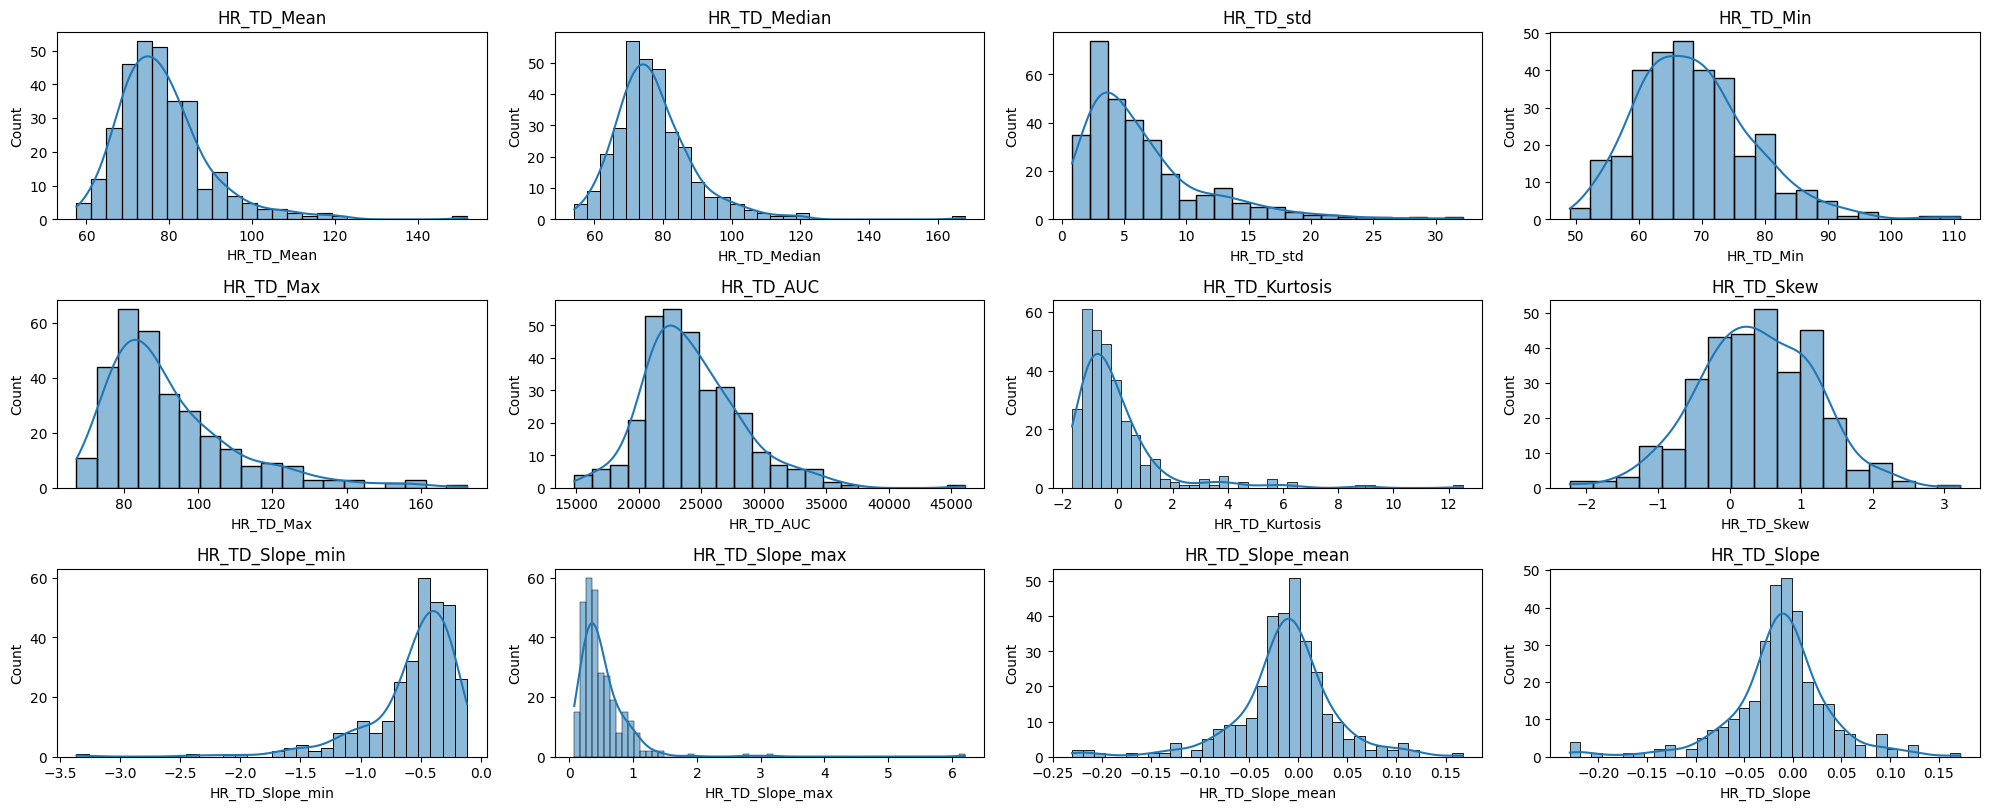

In [12]:
hist_subplots(heart_rate, id_columns)

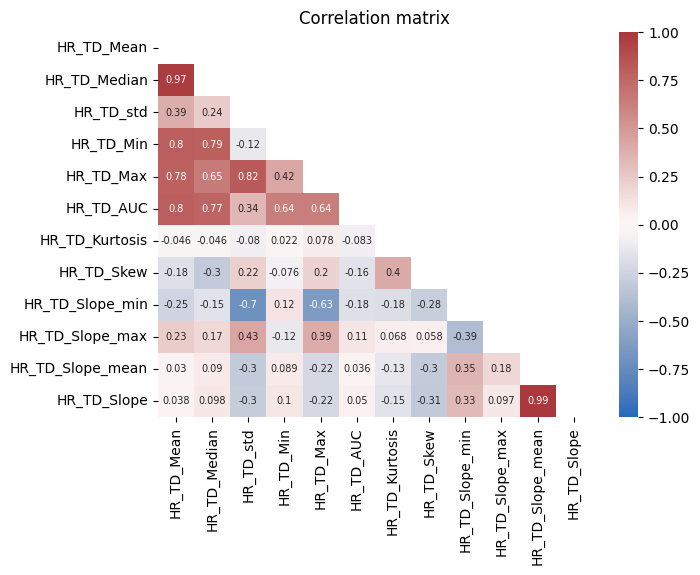

In [13]:
corr_heatmap(heart_rate, id_columns)

### Temperature

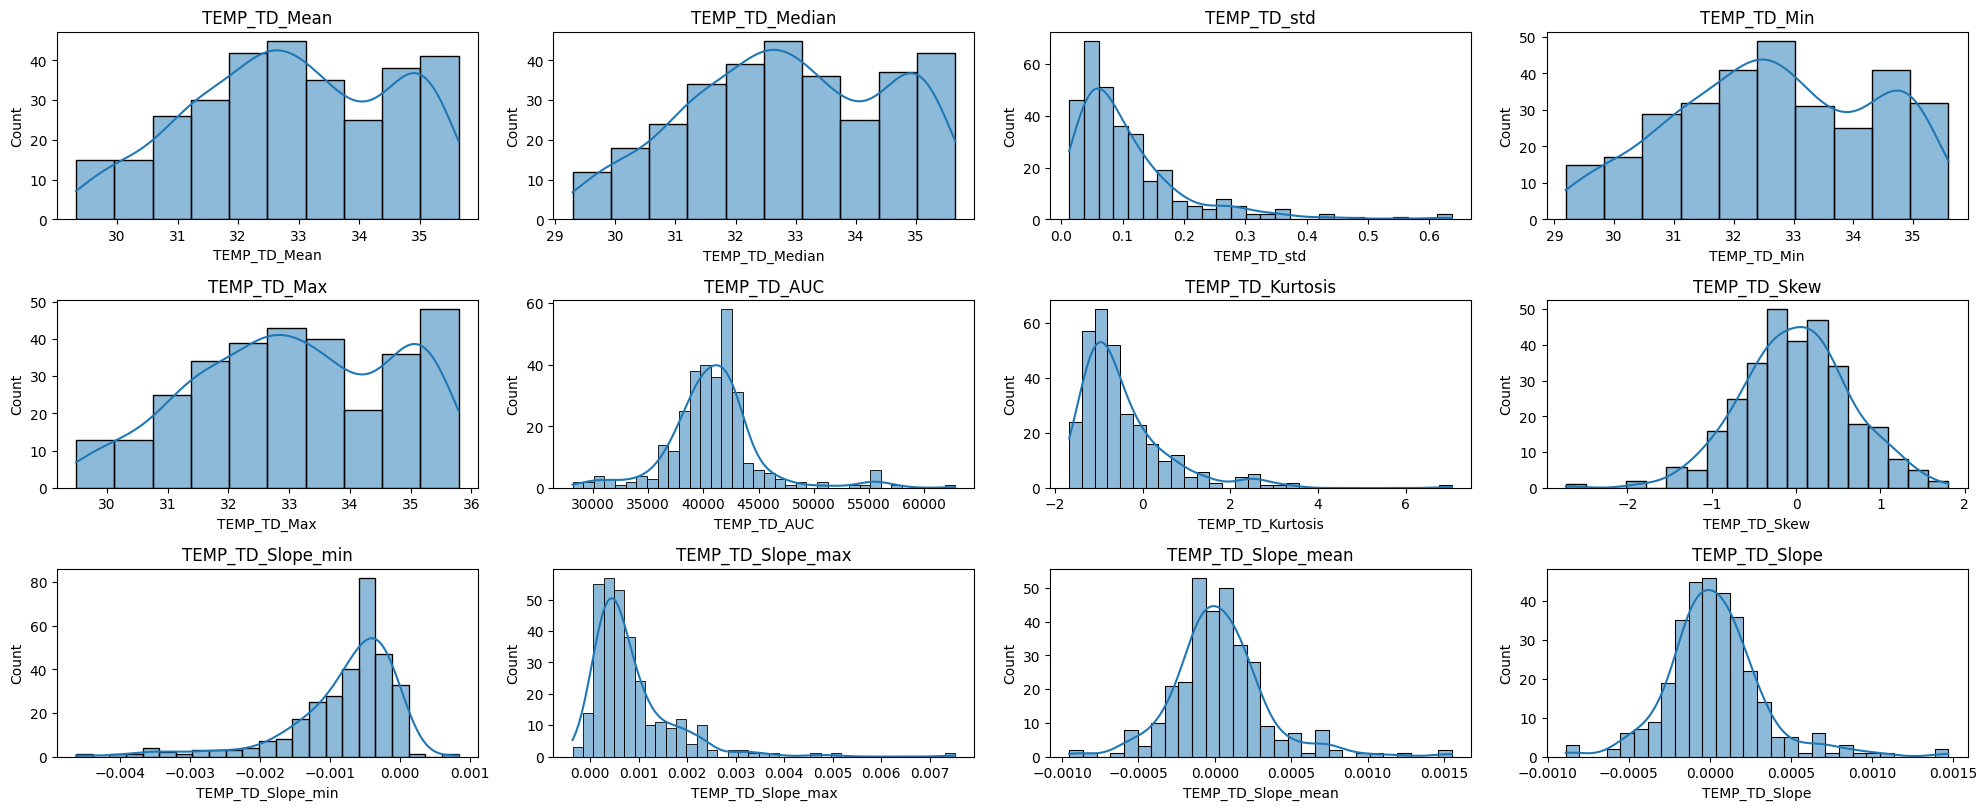

In [14]:
hist_subplots(temperature, id_columns)

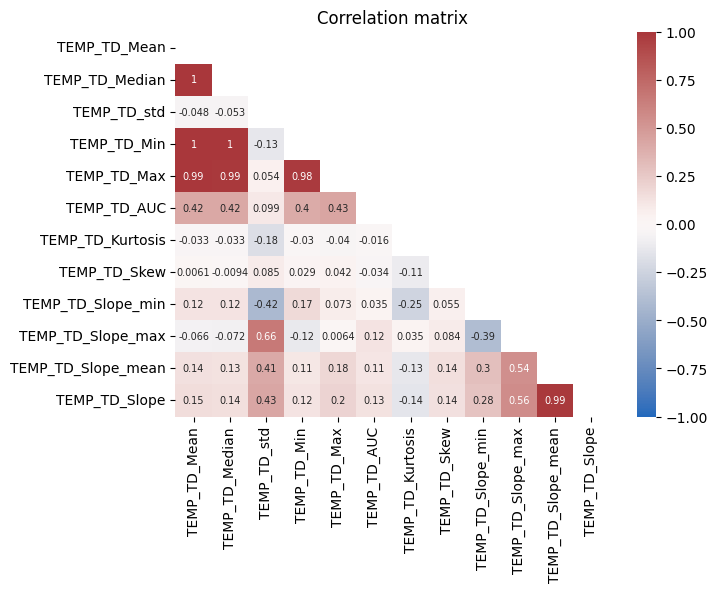

In [15]:
corr_heatmap(temperature, id_columns)

### EDA Phasic

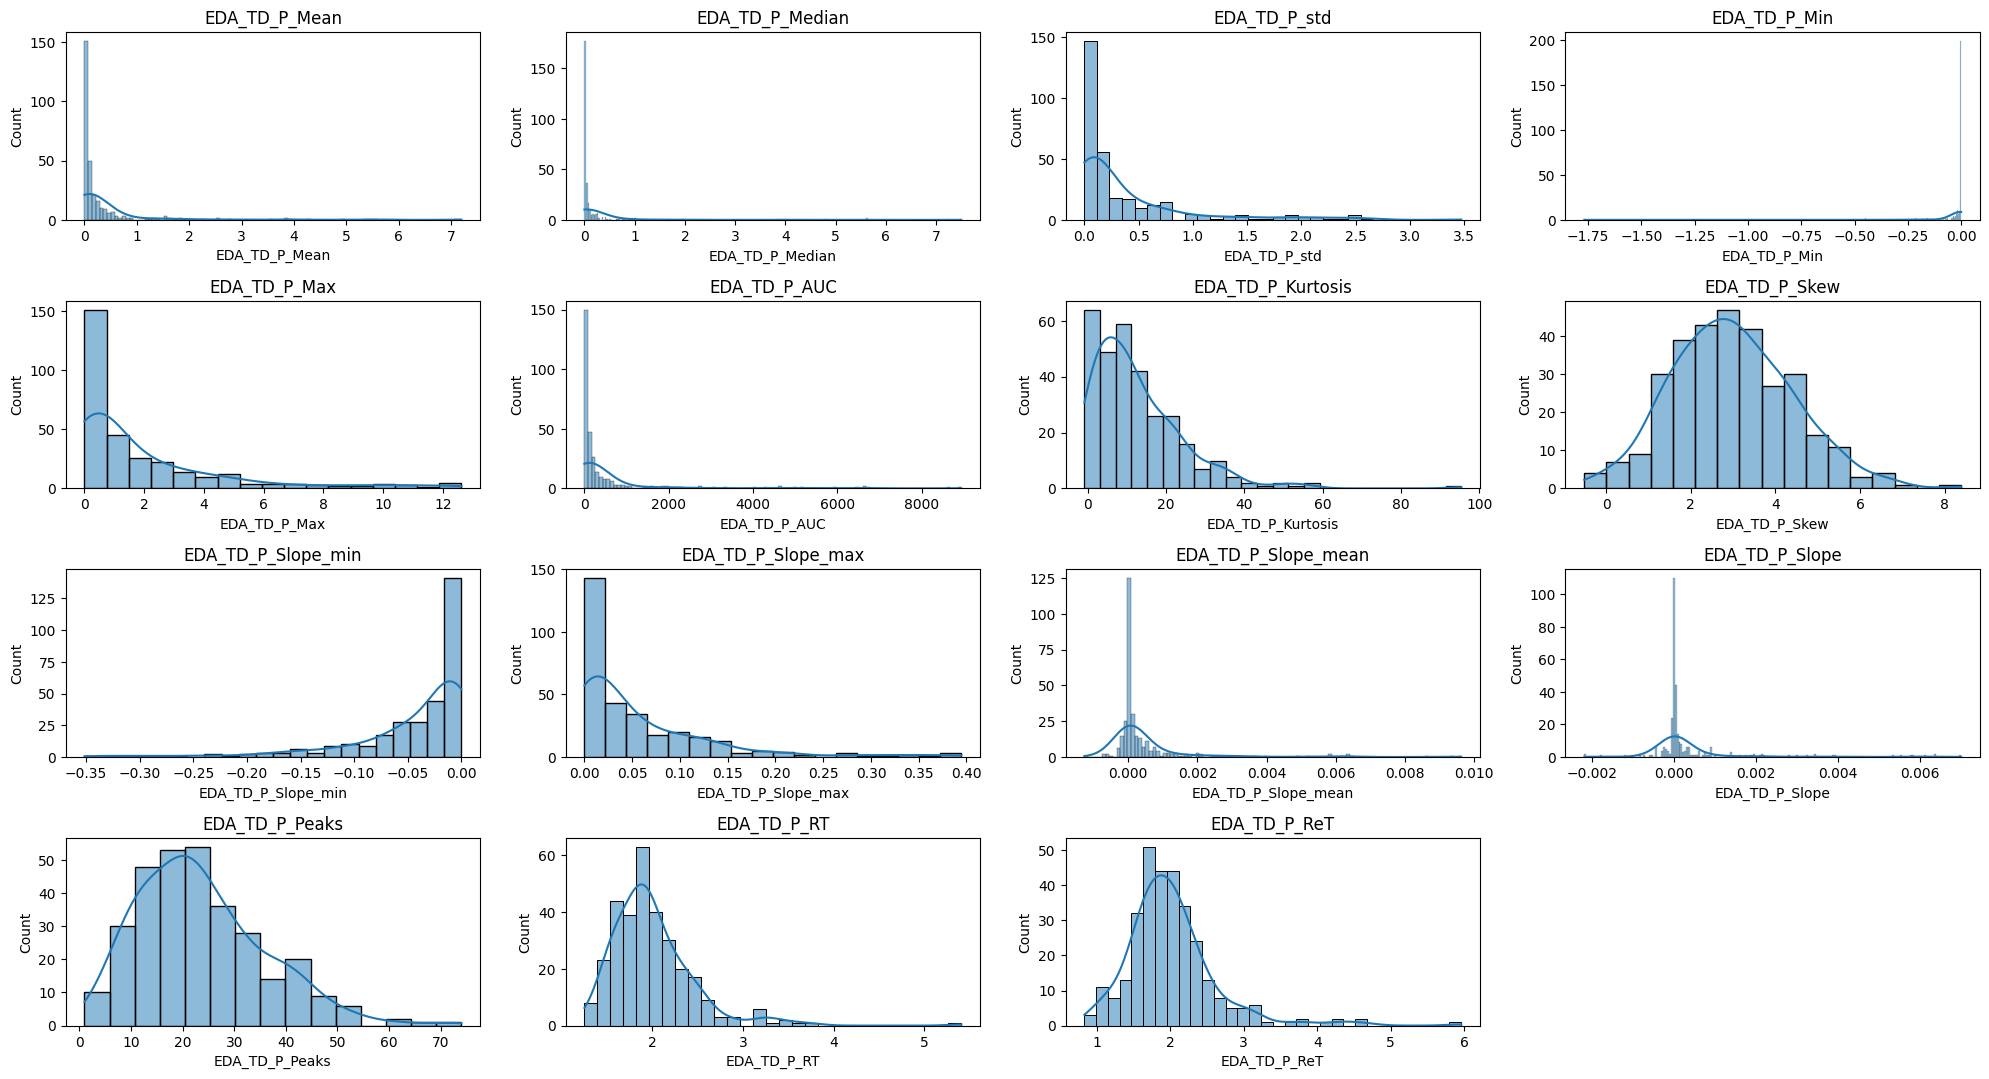

In [16]:
hist_subplots(eda_phasic, id_columns)

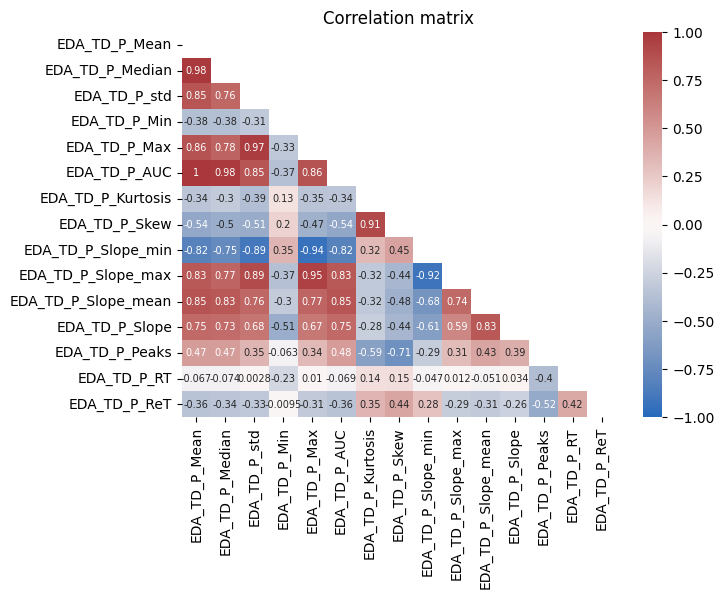

In [17]:
corr_heatmap(eda_phasic, id_columns)

### EDA Tonic

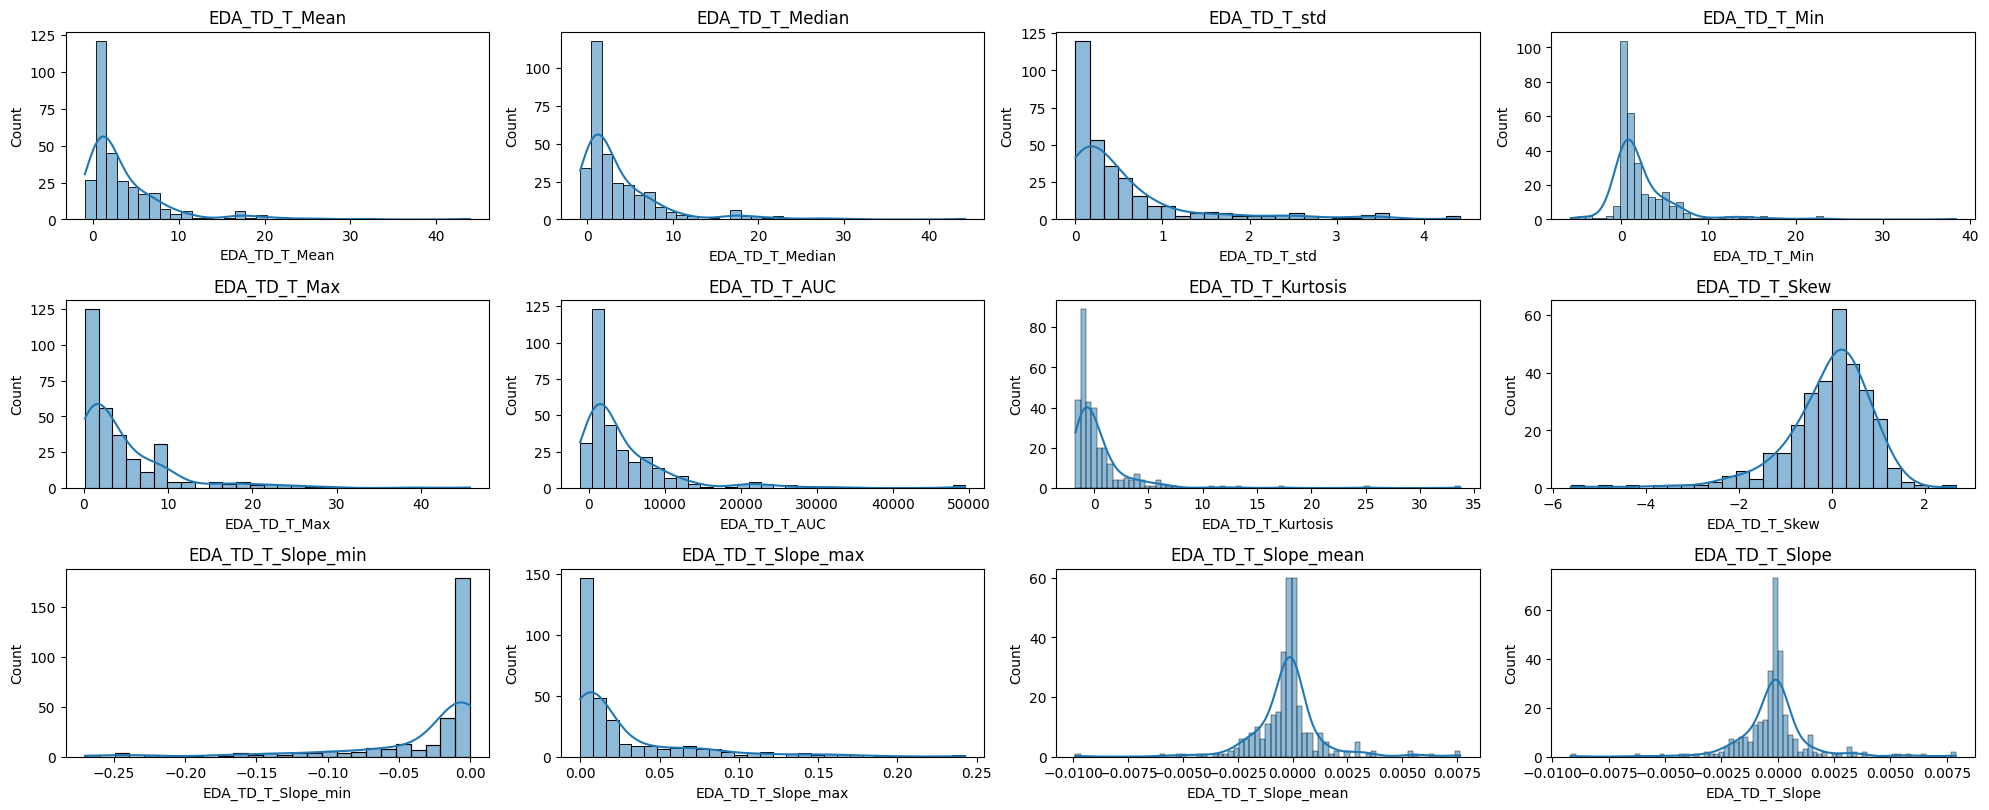

In [18]:
hist_subplots(eda_tonic, id_columns)

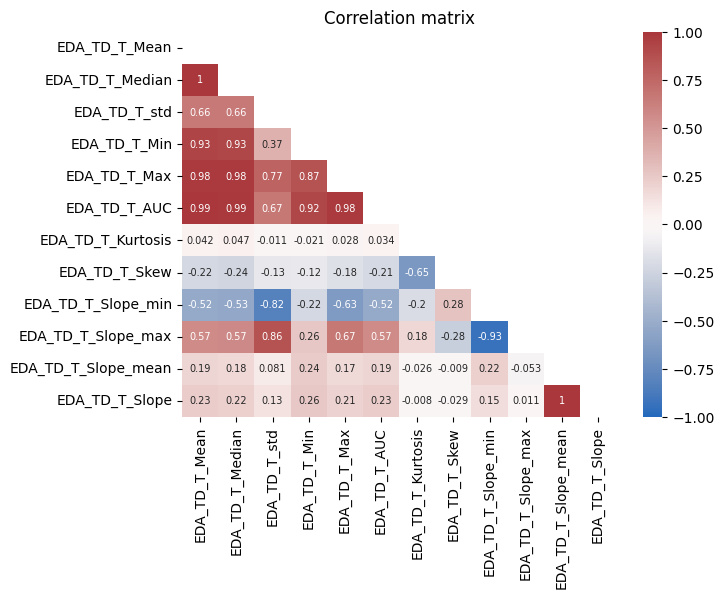

In [19]:
corr_heatmap(eda_tonic, id_columns)

## Questionnaire data

In [20]:
questionnaire_features = [col for col in questionnaire.columns if col not in id_columns]

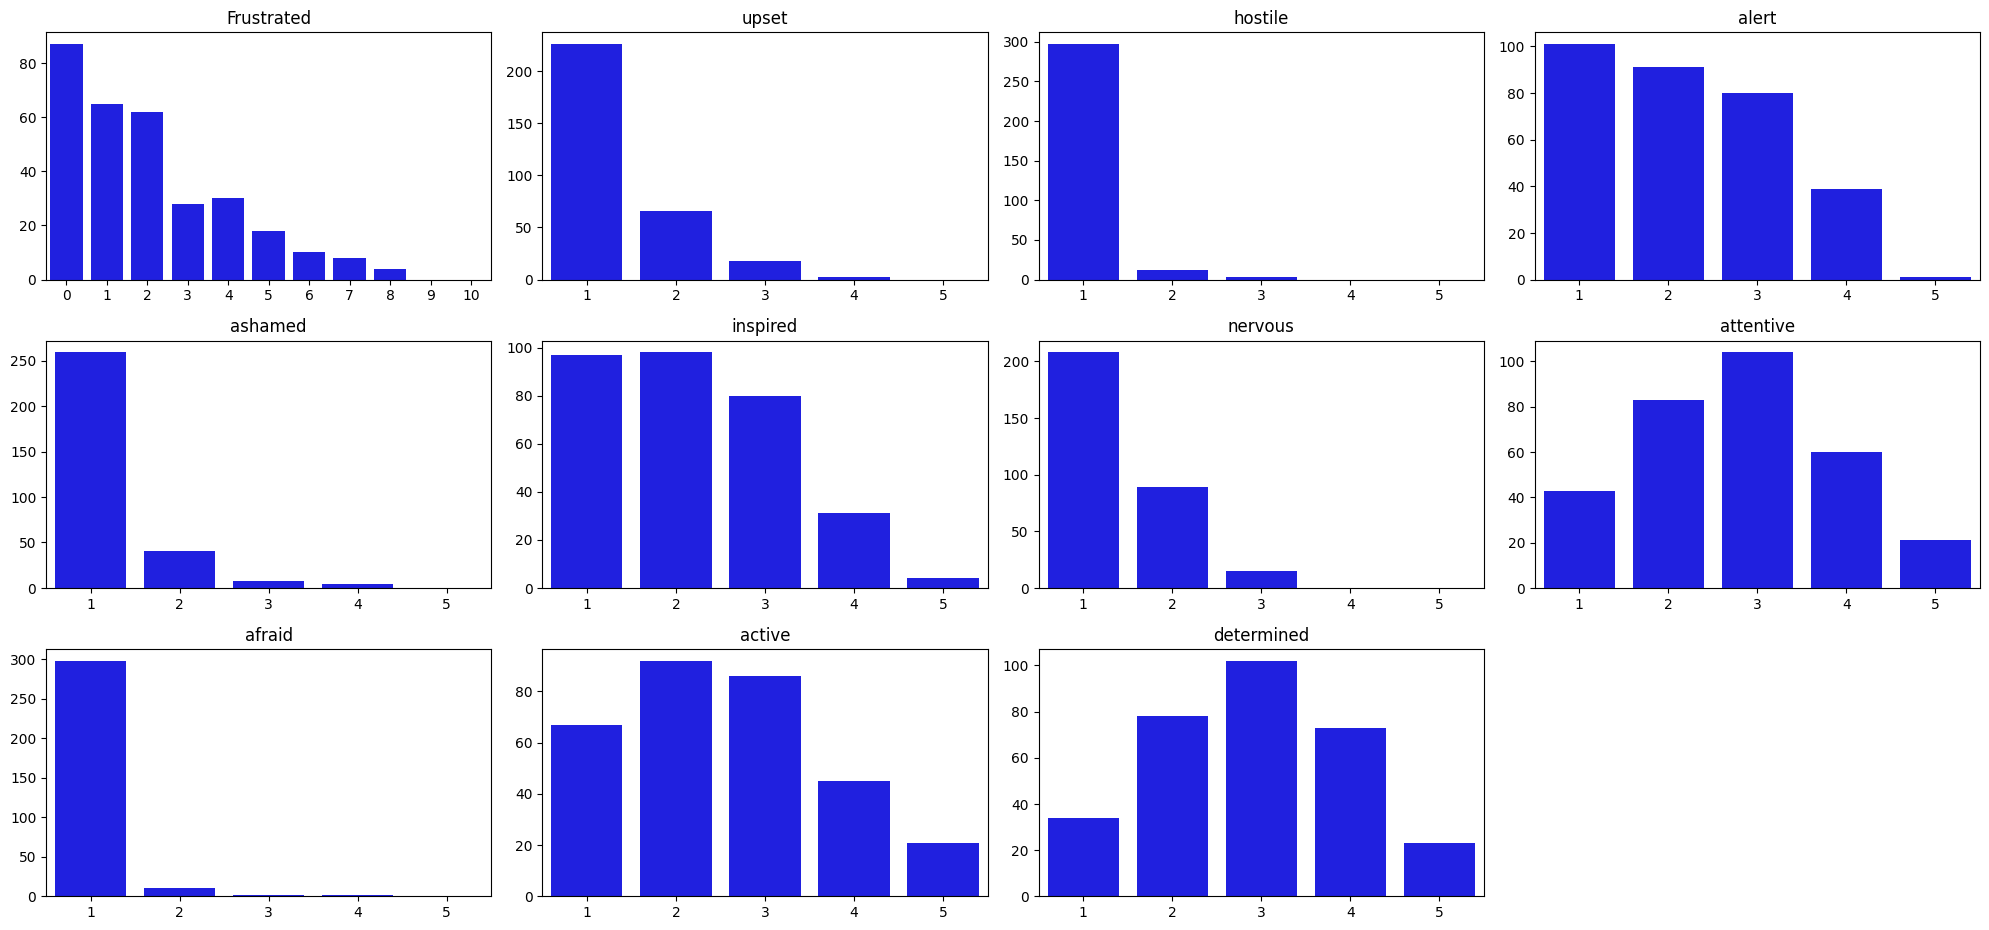

In [21]:
plt.figure(figsize=(20, 40))
for i, col in enumerate(questionnaire_features):
    plt.subplot(13, 4, i + 1)
    if col.lower() == 'frustrated':
        full_range = list(range(0, 11))  # 0 to 10
    else:
        full_range = list(range(1, 6))   # 1 to 5
    value_counts = questionnaire[col].value_counts().reindex(full_range, fill_value=0)
    # Convert x to string to treat them as categorical labels
    sns.barplot(x=[str(x) for x in value_counts.index], y=value_counts.values, color='blue')
    plt.title(col)
    plt.xlabel("")  
    plt.ylabel("")
plt.tight_layout()
plt.show()

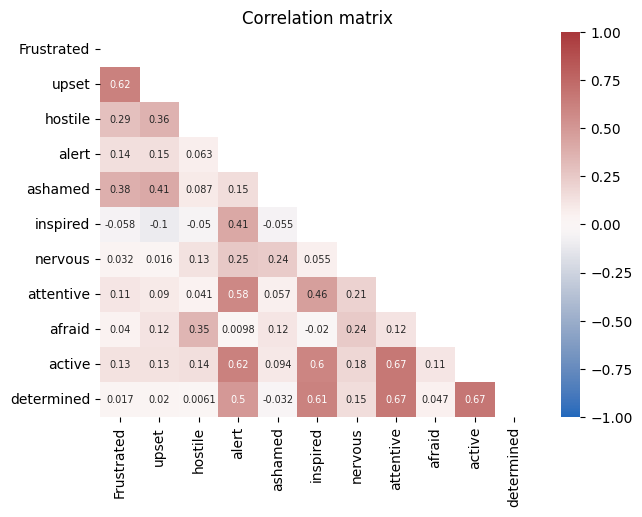

In [22]:
# Subset with only relevant features
questionnaire_subset = questionnaire[questionnaire_features]

# Triangular correlation matrix
mask = np.triu(np.ones_like(questionnaire_subset.corr(), dtype=bool))

# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(questionnaire_subset.corr(), mask=mask, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

__________

## Preprocess data

In [23]:
# List of columns to remove (questionnaire + ID columns will be re-added manually in front)
remove_columns = questionnaire_features + id_columns

# Keep only the physiological features
features = [col for col in data.columns if col not in remove_columns]

# Arrange the final DataFrame with ID columns first
final_data = data[id_columns + features]
final_data.head()

,Round,Phase,Individual,Puzzler,Cohort,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,...,EDA_TD_T_AUC,EDA_TD_T_Kurtosis,EDA_TD_T_Skew,EDA_TD_T_Slope_min,EDA_TD_T_Slope_max,EDA_TD_T_Slope_mean,EDA_TD_T_Slope,EDA_TD_P_Peaks,EDA_TD_P_RT,EDA_TD_P_ReT
0,round_3,phase3,1,1,D1_4,78.663878,76.70,7.480043,67.25,92.48,...,213.374114,1.345997,-1.379434,-0.000144,0.000138,0.000010,1.036040e-05,11,2.522727,2.075000
1,round_3,phase2,1,1,D1_4,76.540732,76.61,2.584756,69.82,82.33,...,213.235380,0.887010,0.854067,-0.000146,0.000165,0.000009,7.714503e-06,15,2.214286,2.192308
2,round_3,phase1,1,1,D1_4,78.173563,77.92,2.681255,72.22,82.80,...,173.465157,0.205817,0.480581,-0.000112,0.000132,0.000002,1.799914e-06,10,1.972222,2.111111
3,round_2,phase3,1,1,D1_4,83.073688,83.88,7.363598,69.42,96.12,...,191.943390,2.488339,1.246665,-0.000455,0.000481,-0.000001,-1.355151e-07,12,1.886364,1.805556
4,round_2,phase2,1,1,D1_4,72.281250,72.91,3.193762,64.95,79.98,...,192.341180,1.196508,1.592099,-0.000420,0.000334,0.000014,1.267198e-05,20,1.812500,1.926471


# Clustering on all features

In [24]:
# Features to compare
features = ['HR_TD_Mean', 'TEMP_TD_Mean', 'EDA_TD_P_Mean', 'EDA_TD_T_Mean']

# Compute resting mean (phase1 + phase3)
resting_data = final_data[final_data['Phase'].isin(['phase1', 'phase3'])].groupby("Individual")[features].mean()
resting_data.columns = [f"{col}_Resting" for col in resting_data.columns]

# Compute task mean (phase2)
task_data = final_data[final_data['Phase'] == 'phase2'].groupby("Individual")[features].mean()
task_data.columns = [f"{col}_Task" for col in task_data.columns]

# Merge
comparison = pd.merge(resting_data, task_data, left_index=True, right_index=True)

# Compute % change
for feature in features:
    comparison[f"{feature}_ChangePct"] = (
        (comparison[f"{feature}_Task"] - comparison[f"{feature}_Resting"]) /
        comparison[f"{feature}_Resting"]
    ) * 100

comparison

,HR_TD_Mean_Resting,TEMP_TD_Mean_Resting,EDA_TD_P_Mean_Resting,EDA_TD_T_Mean_Resting,HR_TD_Mean_Task,TEMP_TD_Mean_Task,EDA_TD_P_Mean_Task,EDA_TD_T_Mean_Task,HR_TD_Mean_ChangePct,TEMP_TD_Mean_ChangePct,EDA_TD_P_Mean_ChangePct,EDA_TD_T_Mean_ChangePct
Individual,,,,,,,,,,,,
1,77.629265,30.532966,0.003331,0.201355,74.831508,30.634240,0.001100,0.158865,-3.603997,0.331687,-66.975089,-21.101880
2,70.615941,33.175119,0.061673,1.967569,73.407084,33.169756,0.229599,2.318295,3.952568,-0.016168,272.284929,17.825389
3,92.385643,32.395267,0.047496,0.900820,84.153983,32.971493,0.090439,1.047830,-8.910108,1.778735,90.414793,16.319554
4,77.291507,32.824556,0.080472,3.900206,79.099801,32.865465,0.697018,3.066293,2.339576,0.124630,766.166583,-21.381240
5,71.889709,32.702554,0.301735,7.546170,78.068306,32.849737,0.546609,6.768807,8.594550,0.450067,81.155219,-10.301422
6,92.191327,34.595927,0.127161,5.585388,85.174505,34.619365,0.174964,5.533639,-7.611153,0.067748,37.591938,-0.926493
7,75.749285,33.862354,0.034425,1.510171,73.855817,33.453126,0.046674,1.308129,-2.499651,-1.208505,35.580389,-13.378706
8,72.553111,29.784848,0.004033,0.473665,72.541661,29.652922,0.011431,0.527756,-0.015782,-0.442930,183.421353,11.419746
9,84.237000,34.051430,0.009817,0.383608,82.890622,34.222708,0.005136,0.412569,-1.598322,0.502996,-47.686342,7.549610


In [25]:
# Extract only the percentage change columns
percentage_dif_features = [col for col in comparison.columns if col.endswith("_ChangePct")]
comparison_perc_only = comparison[percentage_dif_features]
comparison_perc_only

,HR_TD_Mean_ChangePct,TEMP_TD_Mean_ChangePct,EDA_TD_P_Mean_ChangePct,EDA_TD_T_Mean_ChangePct
Individual,,,,
1,-3.603997,0.331687,-66.975089,-21.101880
2,3.952568,-0.016168,272.284929,17.825389
3,-8.910108,1.778735,90.414793,16.319554
4,2.339576,0.124630,766.166583,-21.381240
5,8.594550,0.450067,81.155219,-10.301422
6,-7.611153,0.067748,37.591938,-0.926493
7,-2.499651,-1.208505,35.580389,-13.378706
8,-0.015782,-0.442930,183.421353,11.419746
9,-1.598322,0.502996,-47.686342,7.549610


In [26]:
# ⚠️ Remove the outlier (Individual 4) based on the extreme EDA_TD_P_Mean_ChangePct value
comparison_perc_only = comparison_perc_only.drop(index=4)
comparison_perc_only

,HR_TD_Mean_ChangePct,TEMP_TD_Mean_ChangePct,EDA_TD_P_Mean_ChangePct,EDA_TD_T_Mean_ChangePct
Individual,,,,
1,-3.603997,0.331687,-66.975089,-21.101880
2,3.952568,-0.016168,272.284929,17.825389
3,-8.910108,1.778735,90.414793,16.319554
5,8.594550,0.450067,81.155219,-10.301422
6,-7.611153,0.067748,37.591938,-0.926493
7,-2.499651,-1.208505,35.580389,-13.378706
8,-0.015782,-0.442930,183.421353,11.419746
9,-1.598322,0.502996,-47.686342,7.549610
10,7.963570,0.199733,4.587835,18.998677


/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

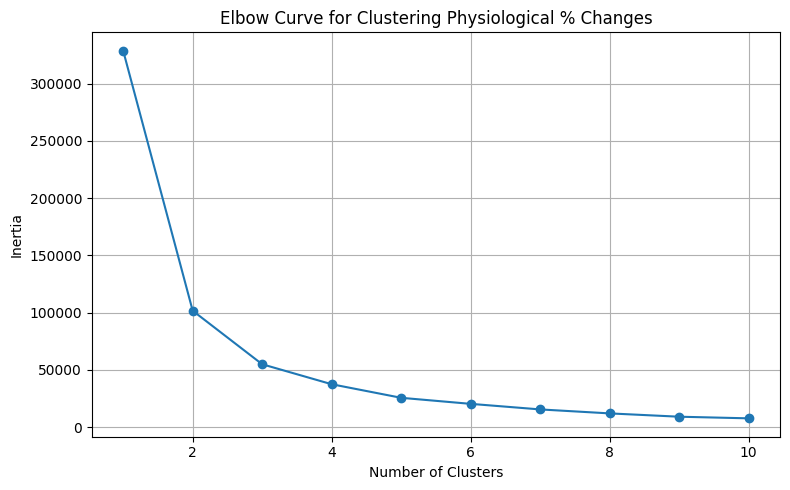

In [27]:
# Elbow method: Calculate inertia for k from 1 to 10
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(comparison_perc_only)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Curve for Clustering Physiological % Changes")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


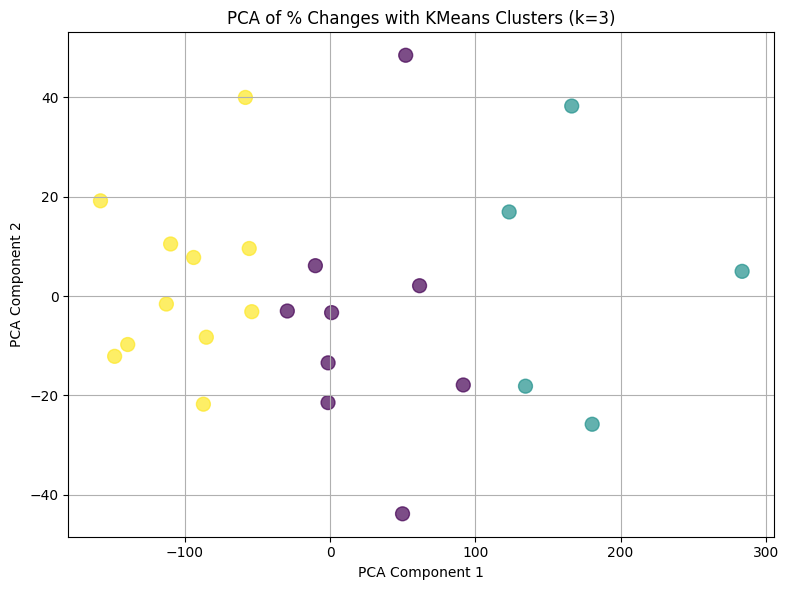

In [28]:
# PCA directly on raw percentage data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(comparison_perc_only)

# KMeans clustering on PCA result
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Store cluster labels
comparison_perc_only["Cluster"] = labels

# Plot PCA with clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=100, alpha=0.7)
plt.title("PCA of % Changes with KMeans Clusters (k=3)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Compute cluster summary
cluster_summary = comparison_perc_only.groupby("Cluster").mean().reset_index()
cluster_summary

,Cluster,HR_TD_Mean_ChangePct,TEMP_TD_Mean_ChangePct,EDA_TD_P_Mean_ChangePct,EDA_TD_T_Mean_ChangePct
0,0,4.746614,0.543109,115.255390,0.149567
1,1,2.203535,0.279218,268.957821,-11.240400
2,2,2.177720,-0.073366,-8.850558,-5.522089


# Clustering on EDA phasic

In [30]:
# Features to compare
feature_edap = ['EDA_TD_P_Mean']

# Compute resting mean (phase1 + phase3)
resting_data = final_data[final_data['Phase'].isin(['phase1', 'phase3'])].groupby("Individual")[feature_edap].mean()
resting_data.columns = [f"{col}_Resting" for col in resting_data.columns]

# Compute task mean (phase2)
task_data = final_data[final_data['Phase'] == 'phase2'].groupby("Individual")[feature_edap].mean()
task_data.columns = [f"{col}_Task" for col in task_data.columns]

# Merge
comparison_edap = pd.merge(resting_data, task_data, left_index=True, right_index=True)

# Compute % change
for feature in feature_edap:
    comparison_edap[f"{feature}_ChangePct"] = (
        (comparison_edap[f"{feature}_Task"] - comparison_edap[f"{feature}_Resting"]) /
        comparison_edap[f"{feature}_Resting"]
    ) * 100

comparison_edap

,EDA_TD_P_Mean_Resting,EDA_TD_P_Mean_Task,EDA_TD_P_Mean_ChangePct
Individual,,,
1,0.003331,0.001100,-66.975089
2,0.061673,0.229599,272.284929
3,0.047496,0.090439,90.414793
4,0.080472,0.697018,766.166583
5,0.301735,0.546609,81.155219
6,0.127161,0.174964,37.591938
7,0.034425,0.046674,35.580389
8,0.004033,0.011431,183.421353
9,0.009817,0.005136,-47.686342


In [31]:
# Extract only the percentage change columns
percentage_dif_features = [col for col in comparison_edap.columns if col.endswith("_ChangePct")]
comparison_perc_only_edap = comparison_edap[percentage_dif_features]

# ⚠️ Remove the outlier (Individual 4) based on the extreme EDA_TD_P_Mean_ChangePct value
comparison_perc_only_edap = comparison_perc_only_edap.drop(index=4)
comparison_perc_only_edap

,EDA_TD_P_Mean_ChangePct
Individual,
1,-66.975089
2,272.284929
3,90.414793
5,81.155219
6,37.591938
7,35.580389
8,183.421353
9,-47.686342
10,4.587835


/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

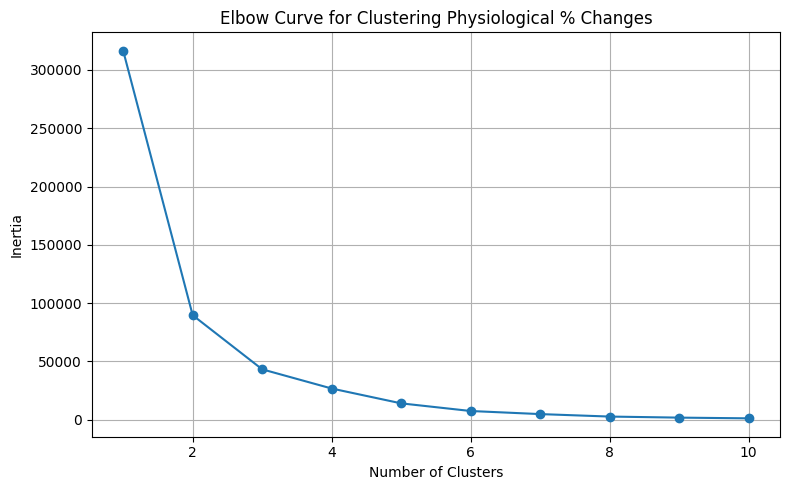

In [32]:
# Elbow method: Calculate inertia for k from 1 to 10
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(comparison_perc_only_edap)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Curve for Clustering Physiological % Changes")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

/Users/raquel/opt/anaconda3/envs/SYP_group17/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


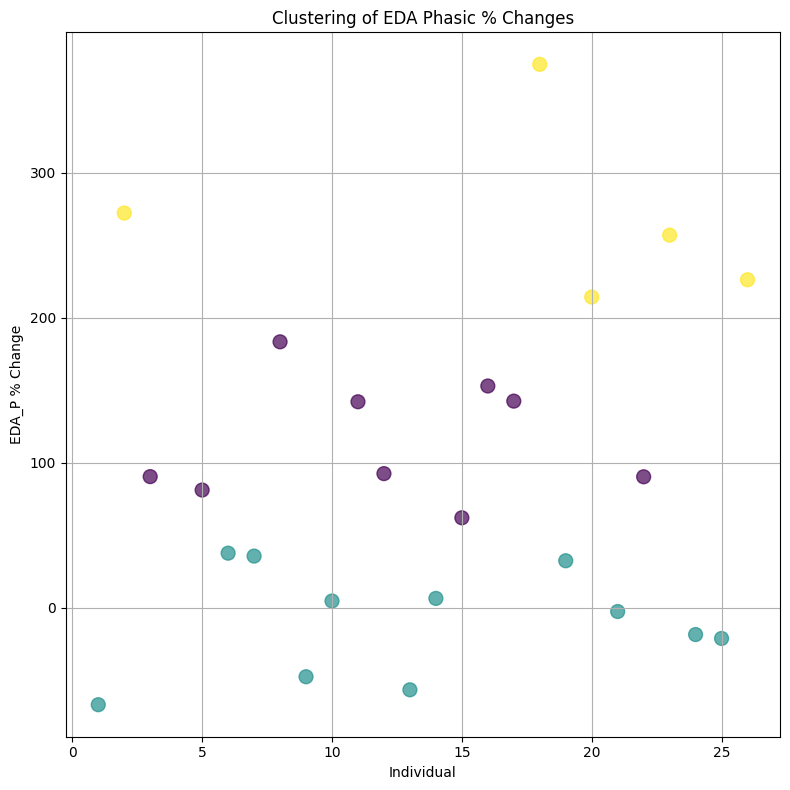

In [33]:
# KMeans clustering on 1D feature
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(comparison_perc_only_edap)

comparison_perc_only_edap["Cluster"] = labels

# Plot the results
plt.figure(figsize=(8, 8))
plt.scatter(comparison_perc_only_edap.index, comparison_perc_only_edap["EDA_TD_P_Mean_ChangePct"], 
            c=labels, cmap="viridis", s=100, alpha=0.7)
plt.title("Clustering of EDA Phasic % Changes")
plt.xlabel("Individual")
plt.ylabel("EDA_P % Change")
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Compute cluster summary
cluster_summary_edap = comparison_perc_only_edap.groupby("Cluster").mean().reset_index()
cluster_summary_edap

,Cluster,EDA_TD_P_Mean_ChangePct
0,0,115.255390
1,1,-8.850558
2,2,268.957821


_______

## Match stress levels with self-reported emotional data

In [ ]:
# Step 2: Merge based on Round, Phase, and Individual
merged_data = pd.merge(
    phase2_data,
    questionnaire,
    on=["Round", "Phase", "Individual", "Puzzler"],
    suffixes=("_physio", "_selfreport")
)
merged_data

,Round,Phase,Individual,Puzzler,Cohort_physio,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,round_3,phase2,1,1,D1_4,76.540732,76.61,2.584756,69.82,82.33,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
1,round_2,phase2,1,1,D1_4,72.281250,72.91,3.193762,64.95,79.98,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0
2,round_4,phase2,1,1,D1_4,76.542762,75.58,5.519411,66.88,85.70,...,1.0,1.0,2.0,1.0,3.0,2.0,4.0,1.0,3.0,3.0
3,round_1,phase2,1,1,D1_4,73.961289,71.53,5.500071,67.37,87.83,...,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0
4,round_3,phase2,2,0,D1_4,77.586134,76.67,6.282746,66.15,89.37,...,1.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,round_1,phase2,25,0,D1_5,66.570189,62.91,8.919428,54.48,86.28,...,1.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,3.0,3.0
100,round_3,phase2,26,1,D1_5,108.283258,106.63,11.525887,89.17,126.08,...,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
101,round_2,phase2,26,1,D1_5,96.442981,94.03,8.628120,79.02,111.40,...,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,3.0,2.0
102,round_4,phase2,26,1,D1_5,82.019065,78.83,8.794206,69.73,97.18,...,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0


In [ ]:
positive_items = ['active', 'alert', 'attentive', 'determined', 'inspired']
negative_items = ['afraid', 'ashamed', 'hostile', 'nervous', 'upset']

merged_data["Positive_Feelings"] = merged_data[positive_items].mean(axis=1)
merged_data["Negative_Feelings"] = merged_data[negative_items].mean(axis=1)

In [ ]:
print(merged_data[merged_data["StressLevel"] == 0][["StressLevel", "Frustrated", "Positive_Feelings", "Negative_Feelings"]])

     StressLevel  Frustrated  Positive_Feelings  Negative_Feelings
0              0         3.0                2.8                1.6
1              0         2.0                3.6                2.2
2              0         0.0                3.0                1.2
3              0         3.0                2.2                1.8
4              0         0.0                3.2                1.0
..           ...         ...                ...                ...
99             0         2.0                2.8                1.0
100            0         6.0                1.8                1.2
101            0         2.0                2.4                1.2
102            0         7.0                1.6                1.6
103            0         3.0                3.6                1.2

[72 rows x 4 columns]


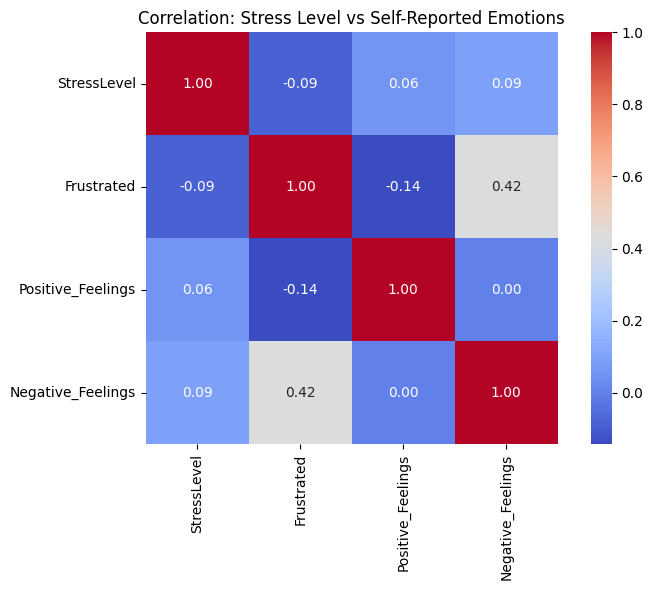

In [ ]:
correlations = merged_data[["StressLevel", "Frustrated", "Positive_Feelings", "Negative_Feelings"]].corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar=True)
plt.title("Correlation: Stress Level vs Self-Reported Emotions")
plt.tight_layout()
plt.show()

The physiological stress clusters do not strongly align with self-reported feelings of frustration or emotional states !!!

> There was minimal correlation between physiological stress levels and self-reported emotions, suggesting that subjective awareness or willingness to report stress may differ from biometric indicators.

_________

<span style="color:red">Everything below this point has not been tested much and you are more than free to delete it, just thought the idea seemed nice.</span>

In [ ]:
# Step 1: Calculate a combined self-report stress score
# Normalize Frustrated to 0–1 scale (since it ranges 0–10)
merged_data["Frustrated_Norm"] = merged_data["Frustrated"] / 10

# Combine Negative Affect and Frustrated into a "SelfReported_Stress"
merged_data["SelfReported_Stress"] = (merged_data["Negative_Feelings"] / 5 + merged_data["Frustrated_Norm"]) / 2

# Step 2: Normalize physiological stress level (already in range 0-2)
merged_data["Physio_Stress"] = merged_data["StressLevel"] / 2

# Step 3: Calculate discrepancy (positive means self-report > physio, negative means the opposite)
merged_data["Stress_Discrepancy"] = merged_data["SelfReported_Stress"] - merged_data["Physio_Stress"]

# Step 4: Categorize individuals into 3 conceptual clusters
def categorize_discrepancy(diff):
    if diff >= 0.2:
        return "Reported more stress than recorded"
    elif diff <= -0.2:
        return "Reported less stress than recorded"
    else:
        return "Reported stress matches bracelet"

merged_data["Stress_Cluster"] = merged_data["Stress_Discrepancy"].apply(categorize_discrepancy)

# Step 5: Count individuals per cluster
stress_cluster_summary = merged_data.groupby("Stress_Cluster")["Individual"].nunique().reset_index(name="Unique Individuals")

print(stress_cluster_summary)

# Show a sample of how individuals are categorized
merged_data[["Individual", "StressLevel", "Negative_Feelings", "Frustrated", "SelfReported_Stress", "Physio_Stress", "Stress_Discrepancy", "Stress_Cluster"]].head()

                       Stress_Cluster  Unique Individuals
0  Reported less stress than recorded                   9
1  Reported more stress than recorded                  19
2    Reported stress matches bracelet                  15


,Individual,StressLevel,Negative_Feelings,Frustrated,SelfReported_Stress,Physio_Stress,Stress_Discrepancy,Stress_Cluster
0,1,0,1.6,3.0,0.31,0.0,0.31,Reported more stress than recorded
1,1,0,2.2,2.0,0.32,0.0,0.32,Reported more stress than recorded
2,1,0,1.2,0.0,0.12,0.0,0.12,Reported stress matches bracelet
3,1,0,1.8,3.0,0.33,0.0,0.33,Reported more stress than recorded
4,2,0,1.0,0.0,0.10,0.0,0.10,Reported stress matches bracelet


In [ ]:
# Filter the group and select only the requested columns
filtered_data = merged_data[merged_data["Stress_Cluster"].str.strip() == "Reported less stress than recorded"]
columns_to_show = [
    "Individual", "StressLevel", "Negative_Feelings", 
    "Frustrated", "SelfReported_Stress", 
    "Physio_Stress", "Stress_Discrepancy"
]

# Display the result
filtered_data[columns_to_show]

,Individual,StressLevel,Negative_Feelings,Frustrated,SelfReported_Stress,Physio_Stress,Stress_Discrepancy
5,2,1,1.0,1.0,0.15,0.5,-0.35
12,4,1,1.4,1.0,0.19,0.5,-0.31
14,4,1,1.2,0.0,0.12,0.5,-0.38
19,5,1,1.6,1.0,0.21,0.5,-0.29
22,6,1,1.2,1.0,0.17,0.5,-0.33
23,6,1,1.2,1.0,0.17,0.5,-0.33
59,15,1,1.4,2.0,0.24,0.5,-0.26
60,16,1,1.0,1.0,0.15,0.5,-0.35
61,16,1,1.2,2.0,0.22,0.5,-0.28
63,16,1,1.0,1.0,0.15,0.5,-0.35
